# Prediksi Bank Marketing

## pendahuluan
Pemasaran produk perbankan merupakan salah satu strategi penting untuk menarik minat nasabah, terutama dalam menawarkan produk keuangan seperti deposito berjangka. Salah satu bentuk pendekatan yang dilakukan oleh lembaga perbankan adalah melalui kampanye telemarketing yang menargetkan nasabah potensial. Namun, kampanye semacam ini membutuhkan analisis yang cermat agar dapat dilakukan secara efisien dan tepat sasaran.

Dataset Bank Marketing yang diperoleh dari UCI Machine Learning Repository berisi data historis dari kampanye pemasaran langsung oleh sebuah bank di Portugal. Kampanye ini bertujuan untuk menawarkan deposito berjangka kepada nasabah. Dataset ini mencakup berbagai atribut seperti usia, pekerjaan, status perkawinan, pendidikan, status pinjaman, informasi kontak, serta hasil dari interaksi sebelumnya dengan nasabah.

Secara keseluruhan, dataset ini terdiri dari 4521 baris data dan 17 atribut, termasuk satu kolom target (y) yang menunjukkan apakah nasabah tersebut akhirnya berlangganan deposito berjangka (yes) atau tidak (no). Analisis terhadap dataset ini dapat digunakan untuk membangun model prediksi, membantu pengambilan keputusan dalam strategi pemasaran, serta meningkatkan efisiensi biaya dan waktu dalam kampanye telemarketing berikutnya.

Melalui eksplorasi dan visualisasi data, kita dapat memahami distribusi atribut, relasi antar fitur, serta proporsi nasabah yang merespons positif terhadap penawaran. Ini menjadi langkah awal dalam membangun sistem prediksi atau rekomendasi yang lebih cerdas dan terarah dalam konteks pemasaran perbankan.



## data understanding

## sumber data
Dataset diambil dari link dibawah ini:

https://archive.ics.uci.edu/dataset/222/bank+marketing

Dataset Bank Marketing yang tersedia di UCI Machine Learning Repository berasal dari Instituto de Engenharia de Sistemas e Computadores, Tecnologia e Ciência (INESC TEC) dan University of Porto, Portugal. Data ini dikumpulkan dari nasabah sebuah bank di Portugal yang menjadi target dalam kampanye pemasaran langsung (direct marketing) melalui panggilan telepon (telemarketing).

Informasi dalam dataset ini merupakan hasil dari interaksi antara pihak bank dan nasabah, yang bertujuan untuk menawarkan produk deposito berjangka (term deposit). Kampanye dilakukan dalam beberapa periode, dan mencatat berbagai informasi demografis, sosial, serta histori kontak dengan nasabah.

Dataset ini terdiri dari 4521 entri dengan 17 atribut, yang mencakup informasi seperti:

- Umur nasabah

- Jenis pekerjaan

- Status pernikahan

- Tingkat pendidikan

- Status pinjaman (perumahan & personal)

- Detail kampanye telemarketing sebelumnya

- Hasil dari interaksi terakhir

## explorasi data



=== Missing Value Secara Teknis (NaN) ===
age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64
❗ Ditemukan missing value.

=== Jumlah Nilai 'unknown' pada Kolom Kategorik ===
job: 0 nilai 'unknown'
education: 0 nilai 'unknown'
contact: 0 nilai 'unknown'
poutcome: 0 nilai 'unknown'

=== Statistik Deskriptif Kolom Numerik ===
                age        balance   day_of_week      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000   

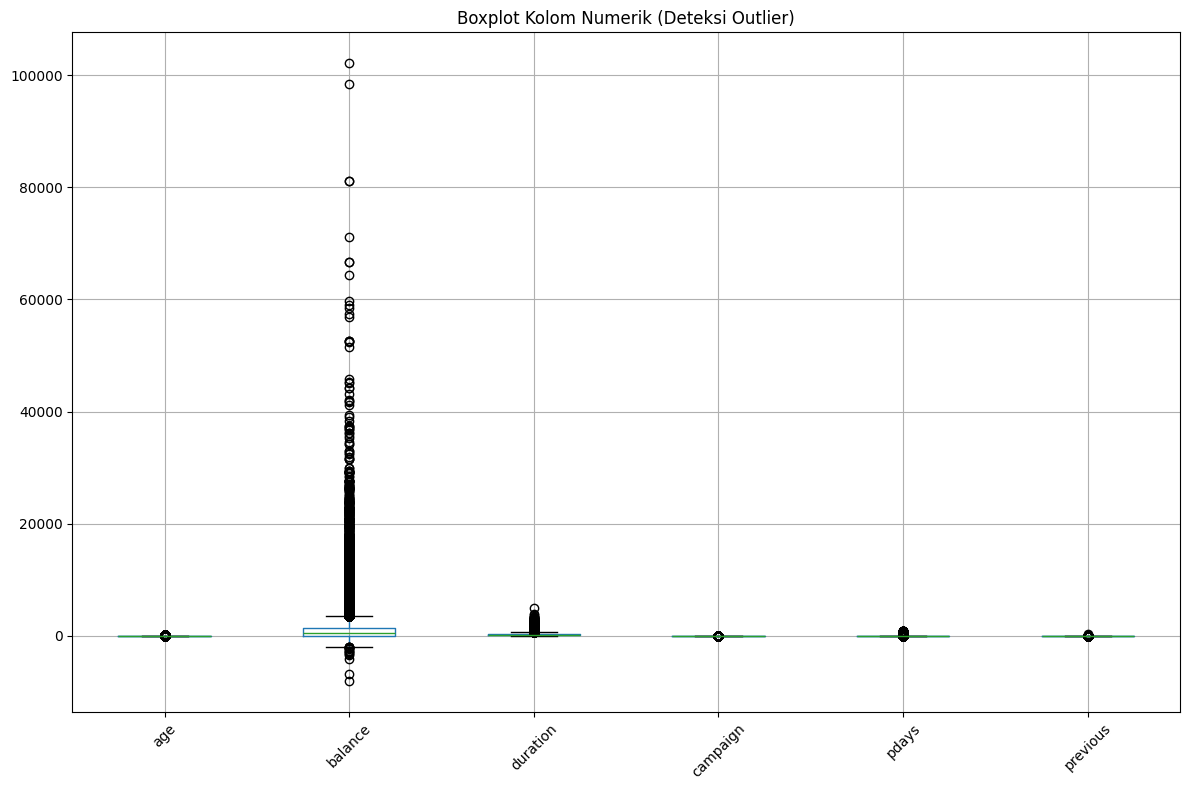

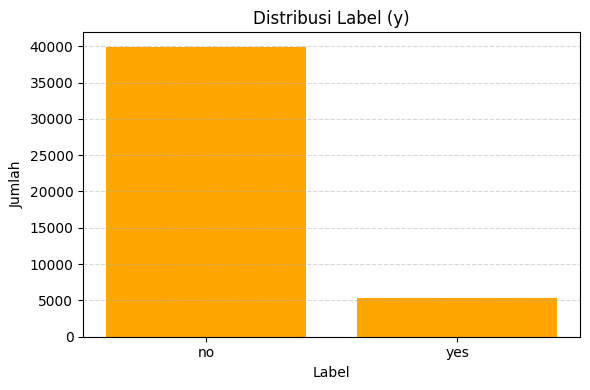


=== Rasio Label (Keseimbangan Kelas) ===
y
no     39922
yes     5289
Name: count, dtype: int64
✅ Proporsi YES: 11.7%
⚠️ Data target tidak seimbang (imbalance). Perlu penanganan jika digunakan untuk klasifikasi.



In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1. Ambil data dari UCI ===
url = "https://archive.ics.uci.edu/static/public/222/data.csv"
data = pd.read_csv(url)

# === 2. Cek missing value (NaN) ===
print("=== Missing Value Secara Teknis (NaN) ===")
missing = data.isnull().sum()
print(missing)
if missing.sum() == 0:
    print("✅ Tidak ada missing value (NaN) secara teknis.\n")
else:
    print("❗ Ditemukan missing value.\n")

# === 3. Cek nilai 'unknown' di kolom kategorik ===
kategori = ['job', 'education', 'contact', 'poutcome']
print("=== Jumlah Nilai 'unknown' pada Kolom Kategorik ===")
for col in kategori:
    jumlah_unknown = (data[col] == 'unknown').sum()
    print(f"{col}: {jumlah_unknown} nilai 'unknown'")
    if jumlah_unknown > 0:
        print(f"⚠️ Kolom '{col}' mengandung nilai tidak diketahui ('unknown').")
print()

# === 4. Statistik deskriptif kolom numerik ===
print("=== Statistik Deskriptif Kolom Numerik ===")
print(data.describe())

# === 5. Deteksi Outlier secara statistik (IQR) ===
numerik = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
print("\n=== Deteksi Outlier dengan Metode IQR ===")
for kolom in numerik:
    Q1 = data[kolom].quantile(0.25)
    Q3 = data[kolom].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    outlier = data[(data[kolom] < batas_bawah) | (data[kolom] > batas_atas)]
    total_outlier = outlier.shape[0]

    if total_outlier > 0:
        print(f"✅ Kolom '{kolom}' memiliki {total_outlier} outlier.")
    else:
        print(f"❌ Kolom '{kolom}' tidak memiliki outlier.")

# === 6. Visualisasi Outlier: Boxplot ===
plt.figure(figsize=(12, 8))
data[numerik].boxplot()
plt.title("Boxplot Kolom Numerik (Deteksi Outlier)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# === 7. Distribusi Label (y) ===
label_counts = data['y'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(label_counts.index, label_counts.values, color='orange')
plt.title("Distribusi Label (y)")
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# === 8. Rasio Label dan Keseimbangan Kelas ===
print("\n=== Rasio Label (Keseimbangan Kelas) ===")
print(label_counts)
yes_ratio = round((label_counts['yes'] / label_counts.sum()) * 100, 2)
print(f"✅ Proporsi YES: {yes_ratio}%")
if yes_ratio < 40:
    print("⚠️ Data target tidak seimbang (imbalance). Perlu penanganan jika digunakan untuk klasifikasi.\n")
else:
    print("✅ Data target relatif seimbang.\n")


## integrasi Data

Untuk dapat mengambil dan mengolah data Bank Marketing, terlebih dahulu diperlukan instalasi paket yang mendukung pengambilan data langsung dari UCI Machine Learning Repository. Salah satu cara yang umum digunakan adalah dengan memanfaatkan pustaka Python bernama ucimlrepo, yang memungkinkan pengguna untuk mengakses dataset UCI secara langsung melalui script Python.

Proses instalasi dan pengambilan data ini berguna untuk menarik data asli dari UCI agar dapat diolah lebih lanjut, baik untuk eksplorasi, analisis statistik, maupun pemodelan machine learning.

Berikut:

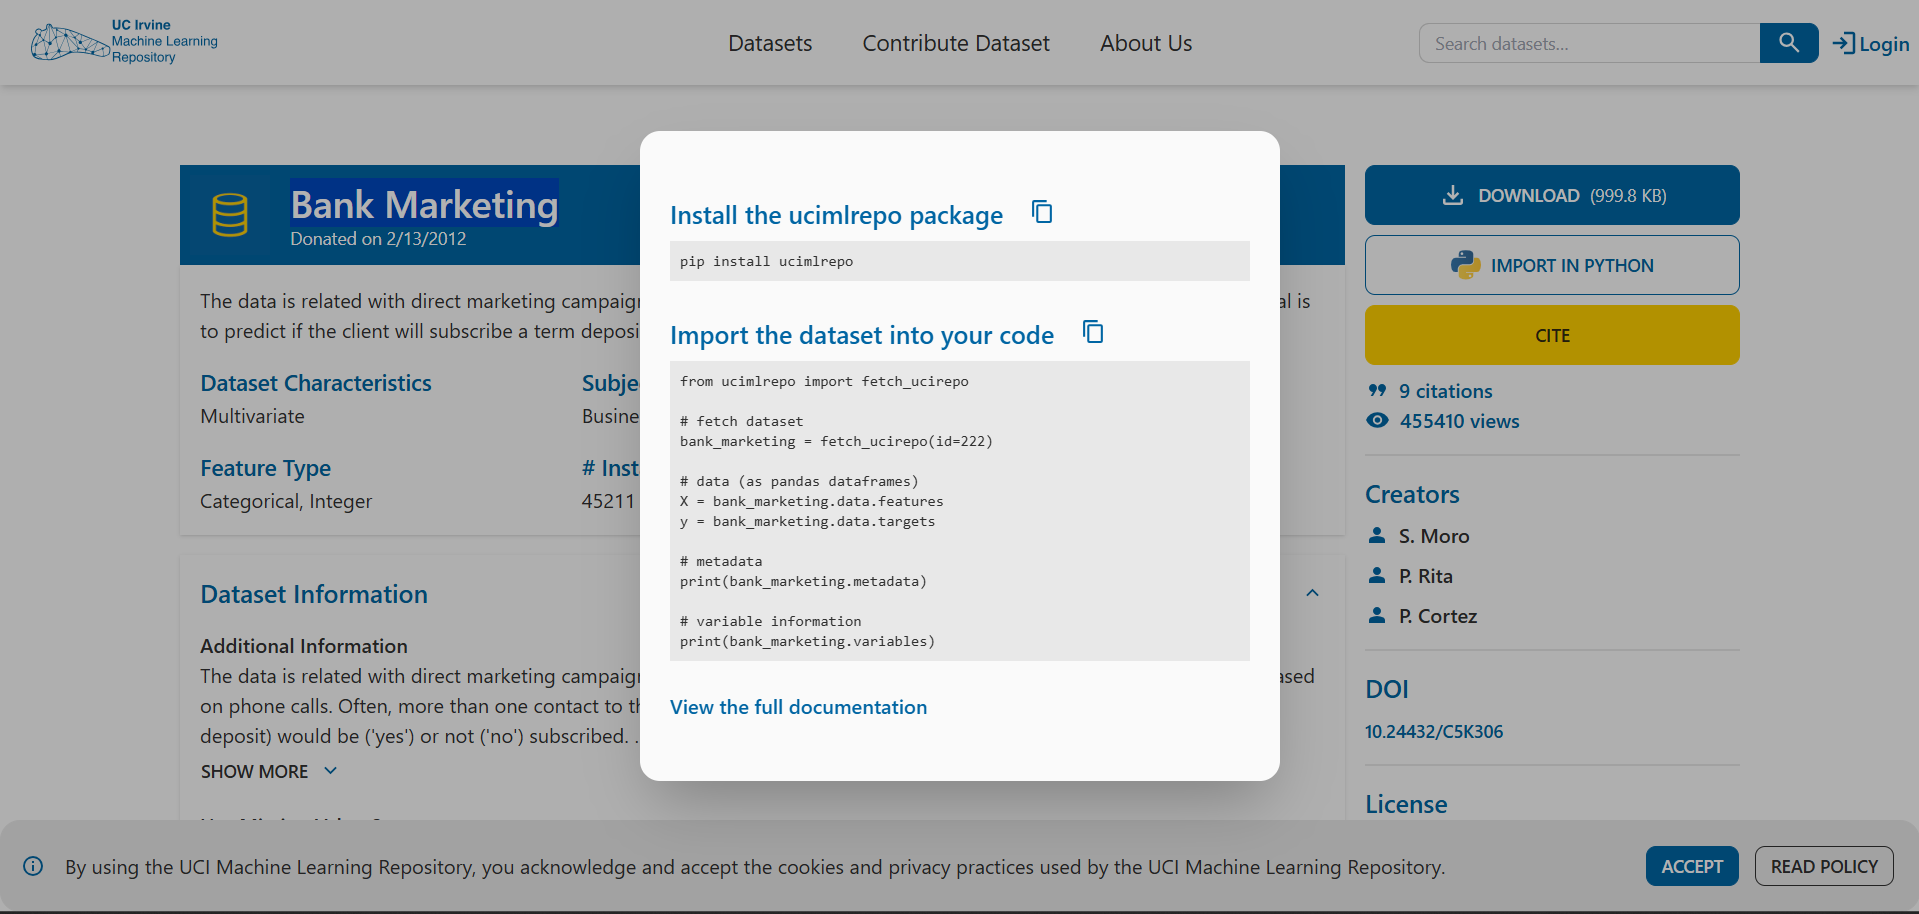

In [17]:
pip install ucimlrepo

In [16]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

## Explorasi data

## Visualisasi data

In [18]:
display(data)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


Jumlah baris: 45211


<Figure size 1200x1000 with 0 Axes>

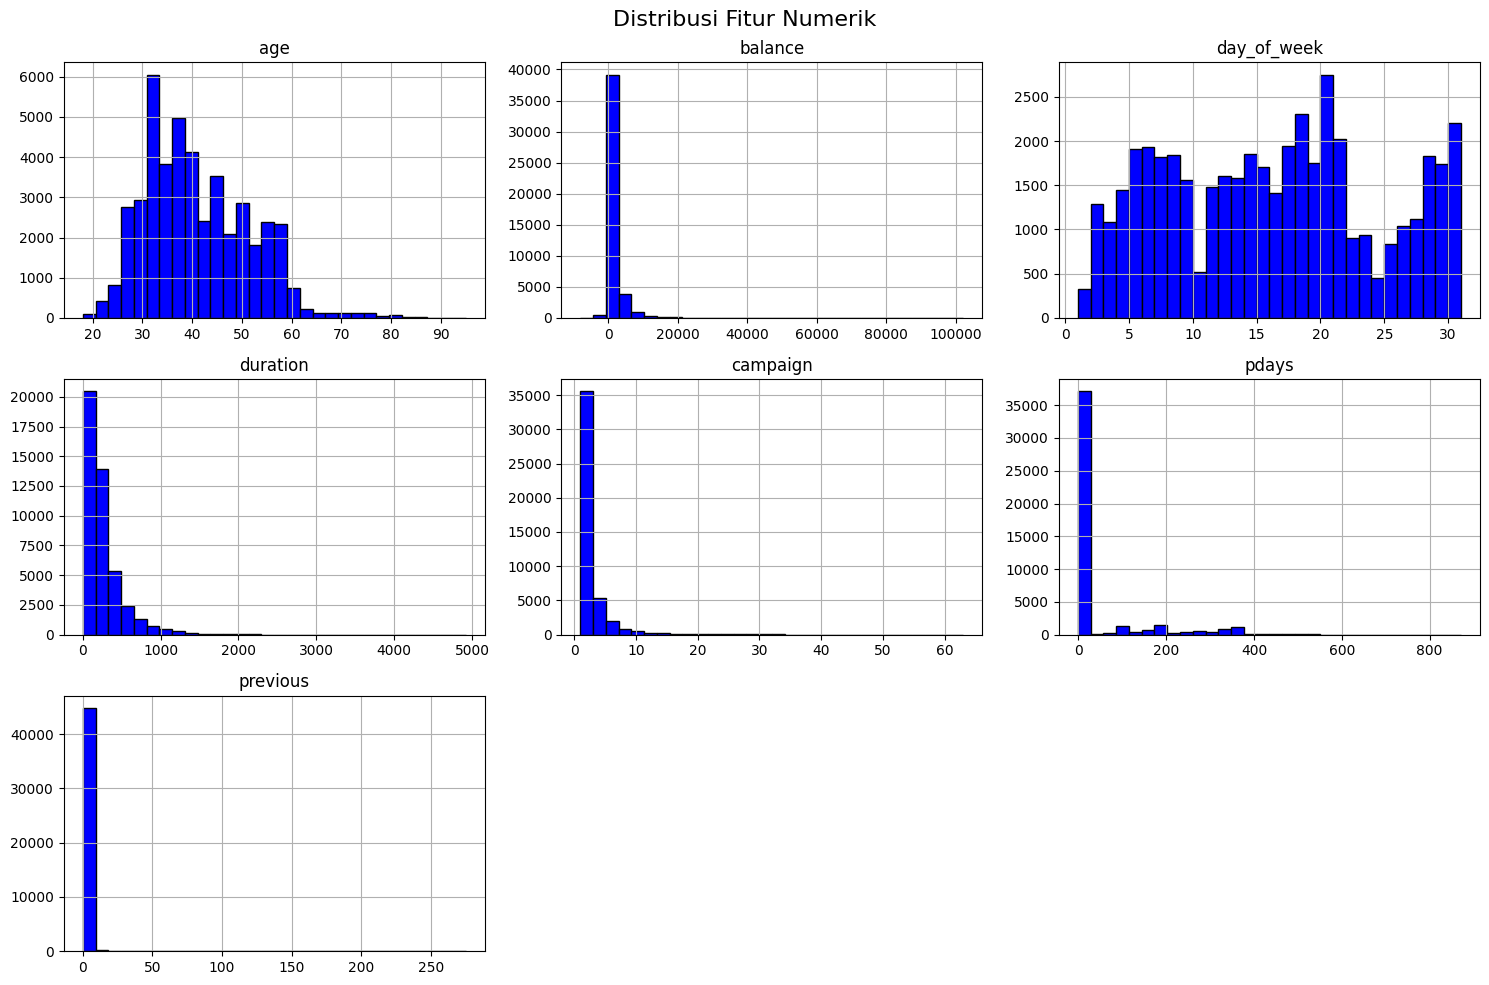

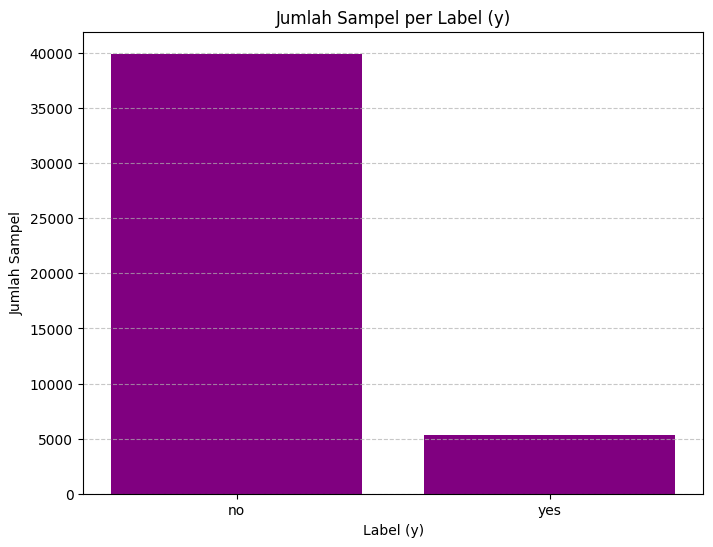

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1. Ambil semua data dari URL ===
url = "https://archive.ics.uci.edu/static/public/222/data.csv"
data = pd.read_csv(url)  # Ambil seluruh data
print("Jumlah baris:", len(data))  # Tampilkan jumlah baris

# === 2. Visualisasi: Distribusi fitur numerik ===
plt.figure(figsize=(12, 10))
numeric_data = data.select_dtypes(include='number')
numeric_data.hist(bins=30, figsize=(15, 10), color='blue', edgecolor='black')
plt.suptitle('Distribusi Fitur Numerik', fontsize=16)
plt.tight_layout()
plt.show()

# === 3. Visualisasi: Jumlah label 'y' (tanpa seaborn) ===
label_counts = data['y'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values, color='purple')
plt.title('Jumlah Sampel per Label (y)')
plt.xlabel('Label (y)')
plt.ylabel('Jumlah Sampel')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 3.	Prepocessing data menggunakan binning

In [26]:
import pandas as pd

# Ambil data dari UCI
url = "https://archive.ics.uci.edu/static/public/222/data.csv"
data = pd.read_csv(url)

# Binning kolom numerik
data['age_bin'] = pd.cut(data['age'], bins=5, labels=['sangat muda', 'muda', 'dewasa', 'tua', 'sangat tua'])
data['balance_bin'] = pd.cut(data['balance'], bins=5, labels=['sangat rendah', 'rendah', 'sedang', 'tinggi', 'sangat tinggi'])
data['duration_bin'] = pd.cut(data['duration'], bins=5, labels=['sangat singkat', 'singkat', 'sedang', 'lama', 'sangat lama'])

# Tampilkan semua data hasil binning
print("=== Semua Data Hasil Binning ===")
print(data[['age', 'age_bin', 'balance', 'balance_bin', 'duration', 'duration_bin']].to_string(index=False))


Streaming output truncated to the last 5000 lines.
  31 sangat muda      242 sangat rendah       106 sangat singkat
  32 sangat muda     8866 sangat rendah       234 sangat singkat
  31 sangat muda      816 sangat rendah       100 sangat singkat
  31 sangat muda      365 sangat rendah       337 sangat singkat
  53      dewasa      183 sangat rendah       835 sangat singkat
  43        muda     3780 sangat rendah        67 sangat singkat
  50      dewasa     3357 sangat rendah       239 sangat singkat
  36        muda     3407 sangat rendah       993        singkat
  31 sangat muda     5205 sangat rendah       529 sangat singkat
  41        muda      254 sangat rendah       183 sangat singkat
  50      dewasa      151 sangat rendah       103 sangat singkat
  25 sangat muda     3630 sangat rendah       221 sangat singkat
  37        muda        3 sangat rendah       105 sangat singkat
  31 sangat muda    15187        rendah       127 sangat singkat
  52      dewasa      437 sangat rendah

## Klasifikasi dengan Decision Tree


=== Evaluasi Model Decision Tree ===
Akurasi : 0.8969330580949573
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11966
           1       0.63      0.30      0.40      1598

    accuracy                           0.90     13564
   macro avg       0.77      0.64      0.67     13564
weighted avg       0.88      0.90      0.88     13564



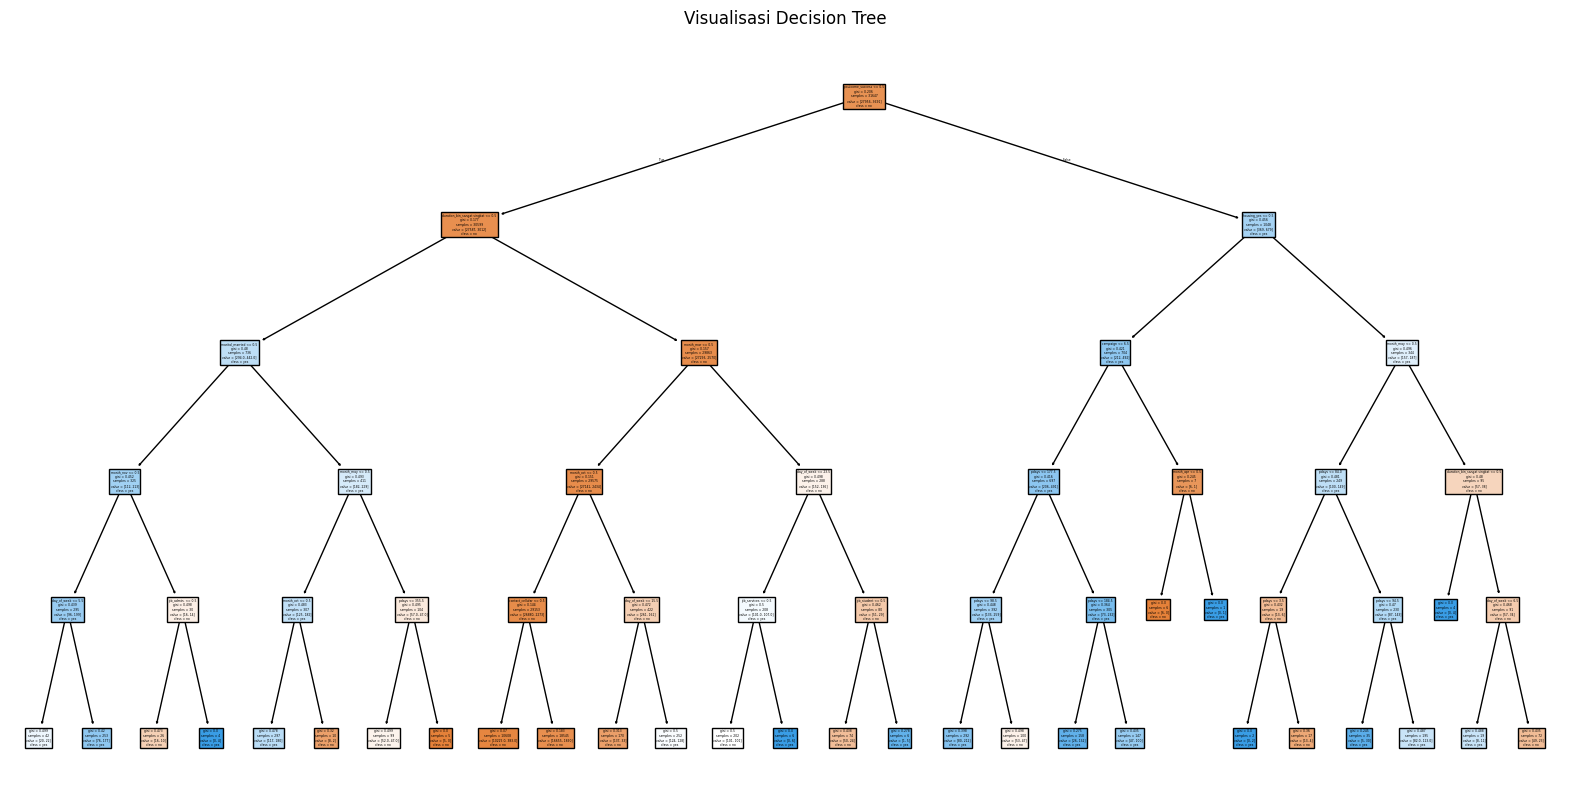

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# 1. Ambil data
url = "https://archive.ics.uci.edu/static/public/222/data.csv"
data = pd.read_csv(url)

# 2. Binning
data['age_bin'] = pd.cut(data['age'], bins=5, labels=['sangat muda', 'muda', 'dewasa', 'tua', 'sangat tua'])
data['balance_bin'] = pd.cut(data['balance'], bins=5, labels=['sangat rendah', 'rendah', 'sedang', 'tinggi', 'sangat tinggi'])
data['duration_bin'] = pd.cut(data['duration'], bins=5, labels=['sangat singkat', 'singkat', 'sedang', 'lama', 'sangat lama'])

# 3. Drop kolom tidak relevan / redundant
data = data.drop(columns=['duration', 'age', 'balance'])

# 4. Encoding data kategorik (termasuk hasil binning)
data_encoded = pd.get_dummies(data.drop(columns='y'))
target = data['y'].map({'yes': 1, 'no': 0})  # Ubah ke angka 1/0

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(data_encoded, target, test_size=0.3, random_state=42)

# 6. Model Decision Tree
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# 7. Evaluasi
y_pred = clf.predict(X_test)
print("\n=== Evaluasi Model Decision Tree ===")
print("Akurasi :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 8. Visualisasi pohon keputusan
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=data_encoded.columns, class_names=["no", "yes"], filled=True)
plt.title("Visualisasi Decision Tree")
plt.show()
